In [145]:
from sympy import expand, symbols, simplify, factor
import sympy as sp

# State variables 
m1, m2, d1, d2, n1, n2 = symbols('m1 m2 d1 d2 n1 n2', real=True)

# Parameters
wm, wd, Lm, Ld, alpha, beta, uptake_m, uptake_d, gamma_m, gamma_d, gamma_nm, gamma_nd, kappa, R, H = symbols('wm wd Lm Ld alpha beta uptake_m uptake_d gamma_m gamma_d gamma_nm gamma_nd kappa R H', real=True)



h1 = R*H 
h2 = H - h1     
hr2s = 1/3600



#       advection        diffusion       loss      growth
f1 =  (wm/h1)*m2  + kappa/h1 * (m2 - m1) - Lm*m1 + alpha*m1*(n1/(gamma_m + n1))    # surface Microcystis
f2 = (-wm/h2)*m2  + kappa/h2 * (m1 - m2) - Lm*m2                     # bottom Microcystis
f3 = -wd/h1*d1  + kappa/h1 * (d2 - d1) - Ld*d1 + beta*d1*(n1/(gamma_d + n1))      # surface diatoms
f4 = wd/h2*d1   + kappa/h2 * (d1 - d2) - Ld*d2                       # bottom diatoms 
f5 = kappa/h1 * (n2 - n1) - uptake_m*m1*(n1/(n1+gamma_nm))  - d1*uptake_d*(n1/(n1+gamma_nd))     # surface nutrients 
# f6 = 0 
# f6 = kappa/h2 * (n1 - n2)

solution = sp.solve([f1, f2, f3, f4], [m1, m2, d1, d2], dict=True)
solution = sp.solve([f1, f3], [m1, m2, d1, d2], dict=True)

print(solution)
for i, sol in enumerate(solution):
    print(f"Solution {i+1}:")
    for key, value in sol.items():
        print(f"{key} = {simplify(value)}")
        example = value #.subs({R: 0.5, H: 10, kappa: 1e-3, w: 1e-4, v: 1e-4, Lm:1e-5, Ld:1e-5, growth_m:1e-4, growth_d:1e-4}).evalf()
        # print("\t" , example)


[{d1: d2*(gamma_d*kappa + kappa*n1)/(H*Ld*R*gamma_d + H*Ld*R*n1 - H*R*beta*n1 + gamma_d*kappa + gamma_d*wd + kappa*n1 + n1*wd), m1: m2*(gamma_m*kappa + gamma_m*wm + kappa*n1 + n1*wm)/(H*Lm*R*gamma_m + H*Lm*R*n1 - H*R*alpha*n1 + gamma_m*kappa + kappa*n1)}]
Solution 1:
d1 = d2*kappa*(gamma_d + n1)/(H*Ld*R*gamma_d + H*Ld*R*n1 - H*R*beta*n1 + gamma_d*kappa + gamma_d*wd + kappa*n1 + n1*wd)
m1 = m2*(gamma_m*kappa + gamma_m*wm + kappa*n1 + n1*wm)/(H*Lm*R*gamma_m + H*Lm*R*n1 - H*R*alpha*n1 + gamma_m*kappa + kappa*n1)


In [146]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import xarray as xr
import matplotlib.colors as mcolors
import cmocean as cmo

# Reload module
import importlib
import parameters as pm 
importlib.reload(pm)

cmap = cmo.cm.balance

dst = xr.open_dataset("population_dataset_time_2s.nc")

N = len(dst.kappa)
NT = len(dst.t)
print(N)
print(NT)

# hr2s = 1/3600

print(dst)


15
300
<xarray.Dataset> Size: 41MB
Dimensions:  (t: 300, depth: 15, ratio: 15, kappa: 15)
Coordinates:
  * t        (t) int64 2kB 0 120 241 361 482 ... 35518 35639 35759 35880 36000
  * depth    (depth) float32 60B 4.0 4.5 5.0 5.5 6.0 ... 9.0 9.5 10.0 10.5 11.0
  * ratio    (ratio) float32 60B 0.05 0.1143 0.1786 ... 0.8214 0.8857 0.95
  * kappa    (kappa) float32 60B 0.1 0.04394 0.01931 ... 2.276e-06 1e-06
Data variables:
    d1       (t, depth, ratio, kappa) float64 8MB ...
    d2       (t, depth, ratio, kappa) float64 8MB ...
    m1       (t, depth, ratio, kappa) float64 8MB ...
    m2       (t, depth, ratio, kappa) float64 8MB ...
    n1       (t, depth, ratio, kappa) float64 8MB ...


<>:25: SyntaxWarning: invalid escape sequence '\l'
<>:25: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_697228/4104814996.py:25: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel("Re($\lambda$)")
/tmp/ipykernel_697228/4104814996.py:26: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')
/tmp/ipykernel_697228/4104814996.py:27: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_xscale('log')


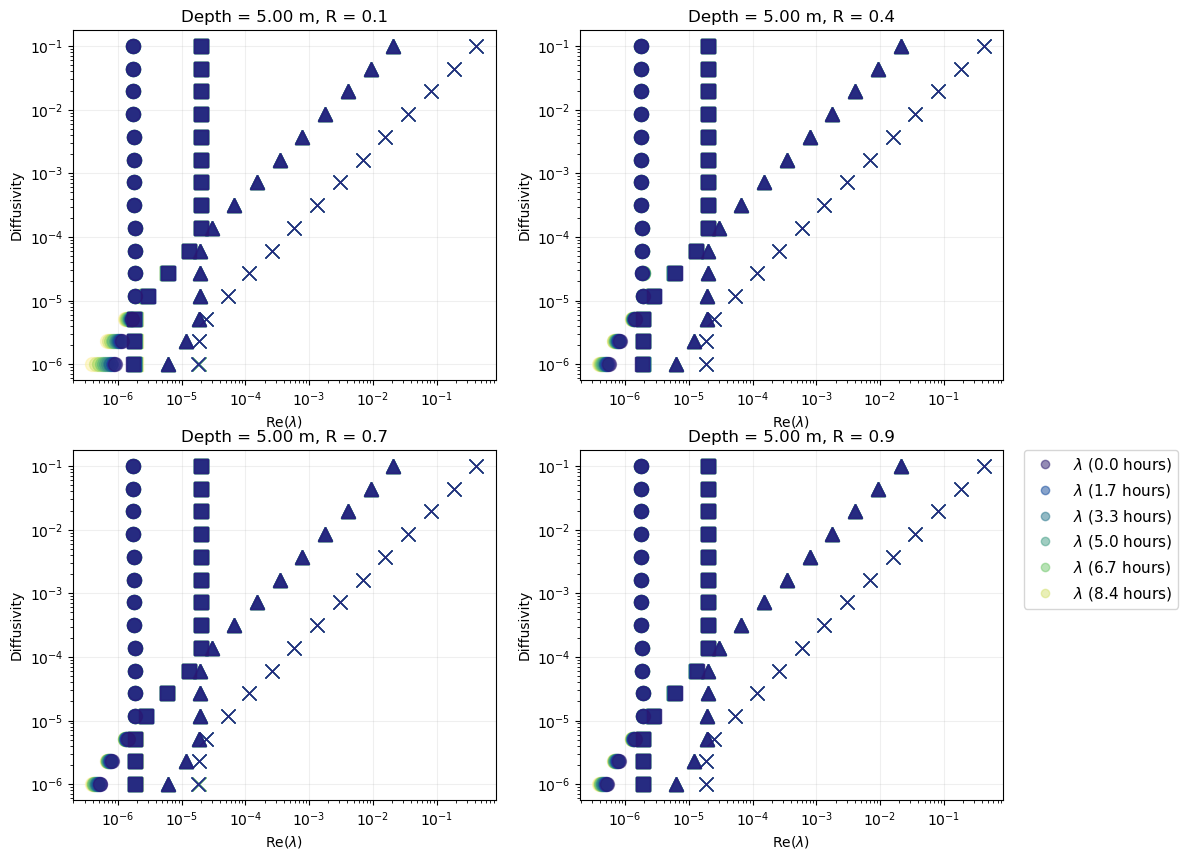

In [147]:
# Snapshot of three time frames 
TIMES = list(range(0, 300, 25)) 

id = 2
ir = 14

# Depth = 5.00 m, R = 0.6, Kappa = 2e-04 (interesting)
depth = dst.depth.values[id]
ratio = dst.ratio.values[ir]
h1 = ratio * depth
h2 = depth - h1

# txt = "Depth = %2.2f m, R = %2.1f, Kappa = %1.0e" % (depth, ratio, kappa)

shapes = ['o', 's', '^', 'x', 'v']
variables = ["M_1", "M_2", "D_1", "D_2", "N_1"]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
axs = axs.flatten()
for ax in axs:
    ax.grid(alpha=0.2)
    ax.axhline(y=0, color='k', alpha=0.5)
    ax.axvline(x=0, color='k', alpha=0.5)
    ax.set_ylabel("Diffusivity")
    ax.set_xlabel("Re($\lambda$)")
    ax.set_yscale('log')
    ax.set_xscale('log')
irs = [0, 5, 10, 14]
for ix, ax in enumerate(axs):
    ir = irs[ix]
    ratio = dst.ratio.values[ir]
    txt = "Depth = %2.2f m, R = %2.1f" % (depth, ratio)
    ax.set_title(txt)
    for ik in range(0, 15, 1):
        kappa = dst.kappa.values[ik]          
        for it in TIMES: 
            hour = dst.t.values[it]/3600
            m1 = dst.m1.values[it, id ,ir, ik]
            m2 = dst.m2.values[it, id ,ir, ik]
            n1 = dst.n1.values[it, id ,ir, ik]
            d1 = dst.d1.values[it, id ,ir, ik]
            d2 = dst.d2.values[it, id ,ir, ik]
            eigenvalues, ev = pm.jacobian_2s(kappa, h1, h2, m1, m2, d1, d2, n1)
            for e, eig in enumerate(eigenvalues):
                if eig.real < 0:
                    eigenvalues[e] = -eig
                    ev[e] = -ev[e]               
            eigenvalues = sorted(eigenvalues)
            vector0 = np.array([m1, m2, n1])
            color = cmo.cm.haline_r(it/max(TIMES))

            for ie, eigenvalue in enumerate(eigenvalues[0:4]):
                # if eigenvalue.real<0:
                #     vector0 = -vector
                # else:
                #     vector0 = vector
                ev0 = ev[ie]/ np.linalg.norm(ev[ie])
                vector0 = vector0/ np.linalg.norm(vector0)
                if eigenvalue.imag != 0:
                    print("Complex eigenvalue!")
                if ((it%2) == 0):
                    ax.plot(abs(eigenvalue.real), kappa, shapes[ie], color=color, alpha=0.5, markersize=10) #, label=r"$\lambda_%d$ (%2.1f hours)" % (ie, hour), )
                    # ax2.plot(ev0.dot(vector0), kappa, shapes[ie],  color=color, alpha=0.5)#,  label=r"$V_%d$ (%2.1f hours)" % (ie, hour))
                else:
                    ax.plot(abs(eigenvalue.real), kappa, shapes[ie],  color=color, alpha=0.5, markersize=10)
                    # ax2.plot(ev0.dot(vector0), kappa, shapes[ie],  color=color, alpha=0.5)
                    # print(ev[ie].dot(ev[ie+1])) 

for it in TIMES[::2]:
    hour = dst.t.values[it]/3600
    ax.plot([],[], 'o', alpha=0.5, color = cmo.cm.haline(it/max(TIMES)),  label=r"$\lambda$ (%2.1f hours)" % (hour)) 

ax.legend(bbox_to_anchor=(1.05, 1), ncols=1, loc='upper left', borderaxespad=0., fontsize=11,)
fn = txt.replace(",", "_")
# fig.savefig("eigens/%s.png" % fn, dpi=300)



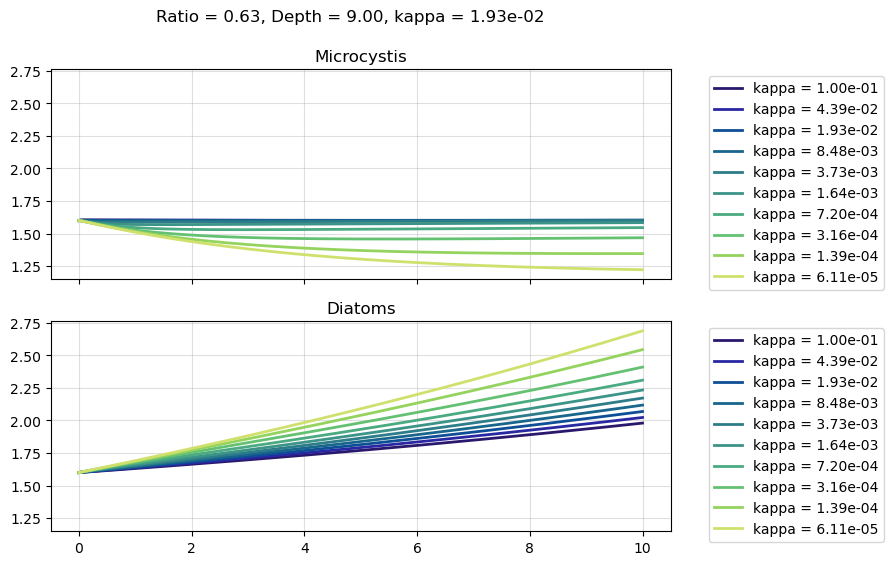

In [148]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8,6), sharex=True, sharey=True)

ik = 2
id = 10
ir = 7 

for ir in range(0, 10):
    color = cmo.cm.haline(ir/10)

    axs[0].plot(dst.t.values/3600, dst.m1[:, id ,ir, ik]/1e6 + dst.m2[:, id, 8, ir]/1e6, 
            color=color,
            linewidth=2,
            label="kappa = %2.2e" % dst.kappa.values[ir])
    axs[1].plot(dst.t.values/3600, dst.d1[:, id ,ir, ik]/1e6 + dst.d1[:, id, 8, ir]/1e6, 
            color=color,
            linewidth=2,
            label="kappa = %2.2e" % dst.kappa.values[ir])

axs[1].set_title("Diatoms")
axs[0].set_title("Microcystis")
title = "Ratio = %2.2f, Depth = %2.2f, kappa = %2.2e" % (dst.ratio.values[ir], dst.depth.values[id], dst.kappa.values[ik])
plt.suptitle(title)

for ax in axs:
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.grid(alpha=0.4)

1600000.0


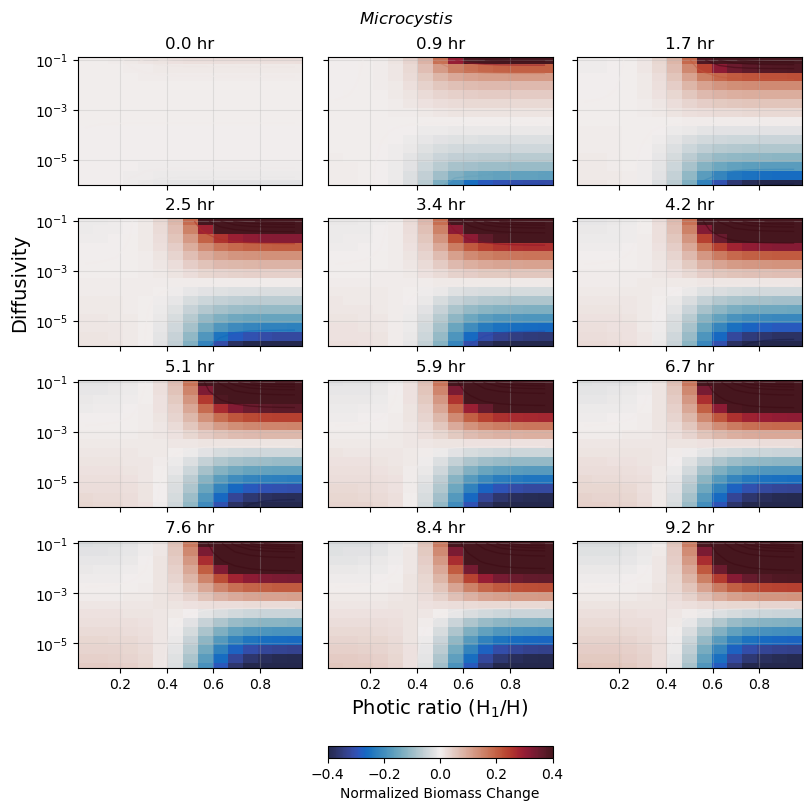

In [149]:

init_biomass = dst.m1.values[0, 0 ,0,0] + dst.m2.values[0, 0 ,0,0]
print(init_biomass)
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(8, 8), sharex=True, sharey=True, constrained_layout=True)
axs = axs.flatten()


# norm 
norm = mcolors.TwoSlopeNorm(vmin=-0.25, vcenter=0, vmax=0.25)


def normalize_color2(value):
    c = (value - init_biomass) / init_biomass
    # c = c.clip(-3, 3)
    return c


def reshape_(data, N):
    return np.array(data).reshape(N, -1)


id = 8
ir = 1
ik = 1
depth = dst.depth.values[id]
fig.suptitle("Depth = %2.2f" % depth)

KAPPA  = dst.kappa.values
RATIO = dst.ratio.values 


NT = 300 
for i, it in enumerate(range(1, NT, NT//12)):
    # color = cmo.cm.haline(it/NT)
    BIOMASS_M = dst.m1.values[it, id, :, :] + dst.m2.values[it, id, :, :]
    axs[i].set_yscale('log')

    axs[i].set_title("%2.1f hr" % (dst.t.values[it]/3600))

    h = axs[i].pcolormesh(RATIO, KAPPA,
                normalize_color2(reshape_(BIOMASS_M, N)), linewidths=4, alpha=0.95, cmap=cmo.cm.balance, vmin=-4e-1, vmax=4e-1) 

    h1 = axs[i].contour(RATIO, KAPPA,
                normalize_color2(reshape_(BIOMASS_M, N)), linewidths=1, alpha=0.5, vmin=-4e-1, vmax=4e-1, cmap=cmo.cm.balance, ) 

plt.colorbar(h, label='Normalized Biomass Change', orientation='horizontal',  pad=0.2, ax=axs[-2])

axs[3].set_ylabel("Diffusivity", fontsize=14)
axs[-2].set_xlabel("Photic ratio (H$_1$/H)", fontsize=14)
plt.suptitle("$Microcystis$")
for ax in axs:
    ax.grid(alpha=0.3)

1600000.0
0.0023985134699037007
0.06429427247983054
0.13001194441339728
0.19978752369306385
0.27387157576651616
0.35253013784085807
0.4360456739322544
0.5247180892594726
0.6188658078008209
0.7188269161362335
0.8249603731651508
0.9376473063565913


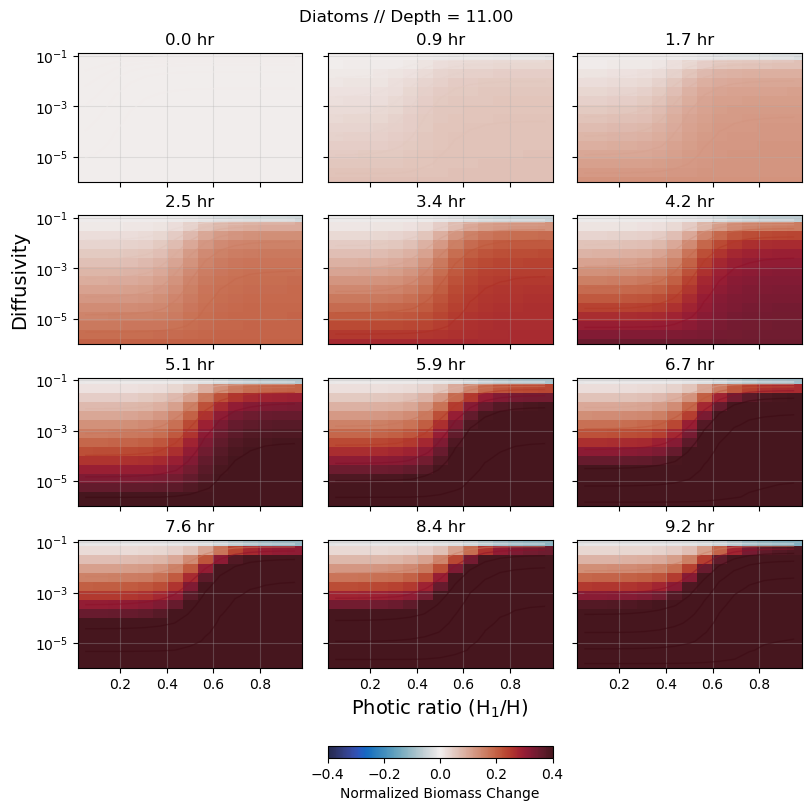

In [150]:

init_biomass = dst.d1.values[0, 0 ,0,0] + dst.d2.values[0, 0 ,0,0]
print(init_biomass)


fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(8, 8), sharex=True, sharey=True, constrained_layout=True)
axs = axs.flatten()
# norm 
norm = mcolors.TwoSlopeNorm(vmin=-0.25, vcenter=0, vmax=0.25)


def normalize_color2(value):
    c = (value - init_biomass) / init_biomass
    # c = c.clip(-3, 3)
    return c


def reshape_(data, N):
    return np.array(data).reshape(N, -1)


id = 14
ir = 1
ik = 1
depth = dst.depth.values[id]
fig.suptitle("Diatoms // Depth = %2.2f" % depth)

KAPPA  = dst.kappa.values
RATIO = dst.ratio.values 
NT = 300 
for i, it in enumerate(range(1, NT, NT//12)):
    # color = cmo.cm.haline(it/NT)
    BIOMASS_D = dst.d1.values[it, id, :, :] + dst.d1.values[it, id, :, :]
    relative = normalize_color2(reshape_(BIOMASS_D, N))
    print(max(relative.flatten()))
    axs[i].set_yscale('log')

    axs[i].set_title("%2.1f hr" % (dst.t.values[it]/3600))

    h = axs[i].pcolormesh(RATIO, KAPPA,
                relative, linewidths=4, alpha=0.95, cmap=cmo.cm.balance, vmin=-4e-1, vmax=4e-1) 

    h1 = axs[i].contour(RATIO, KAPPA,
                relative, linewidths=1, alpha=0.5, vmin=-4e-1, vmax=4e-1, cmap=cmo.cm.balance, ) 

plt.colorbar(h, label='Normalized Biomass Change', orientation='horizontal',  pad=0.2, ax=axs[-2])

axs[3].set_ylabel("Diffusivity", fontsize=14)
axs[-2].set_xlabel("Photic ratio (H$_1$/H)", fontsize=14)

for ax in axs:
# ax.plot([], [], color=color, label="%2.1f hr" % (dst.t.values[it]/3600), linewidth=4, alpha=0.5)
    # ax.set_xlabel("Photic ratio (H$_1$/H)")
    # ax.set_ylabel("Diffusivity")
    # # ax.legend(ncols=2, bbox_to_anchor=(1.05, 1), loc='upper left', title="Time")
    # ax.set_title("Microcystis")
    ax.grid(alpha=0.3)

1600000.0


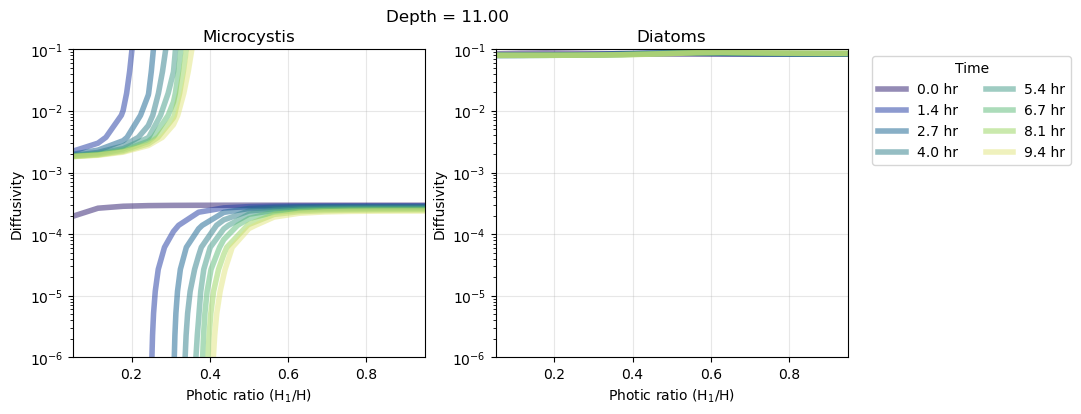

In [151]:
init_biomass = dst.m1.values[0, 0 ,0,0] + dst.m2.values[0, 0 ,0,0]
print(init_biomass)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axs = axs.flatten()

for ax in axs:
    ax.set_yscale('log')
    ax.set_xlabel("Photic ratio (H$_1$/H)")
    ax.set_ylabel("Diffusivity")
    
    ax.grid(alpha=0.3)
# norm 
norm = mcolors.TwoSlopeNorm(vmin=-0.25, vcenter=0, vmax=0.25)

def normalize_color2(value):
    c = (value - init_biomass) / init_biomass
    return c


def reshape_(data, N):
    return np.array(data).reshape(N, -1)


depth = dst.depth.values[id]
fig.suptitle("Depth = %2.2f" % depth)

KAPPA  = dst.kappa.values
RATIO = dst.ratio.values 

axs[0].set_title("Microcystis")
axs[1].set_title("Diatoms")

NT = 300 
for it in range(1, NT, 40):

    color = cmo.cm.haline(it/NT)
    BIOMASS_M = dst.m1.values[it, id, :, :] + dst.m2.values[it, id, :, :]
    BIOMASS_D = dst.d1.values[it, id, :, :] + dst.d1.values[it, id, :, :]
    axs[0].contour(RATIO, KAPPA,
                normalize_color2(reshape_(BIOMASS_M, N)), levels=[0], linewidths=4, alpha=0.5, colors=color) 
    axs[1].contour(RATIO, KAPPA,
                normalize_color2(reshape_(BIOMASS_D, N)), levels=[0], linewidths=4, alpha=0.5, colors=color) 

    axs[1].plot([], [], color=color, label="%2.1f hr" % (dst.t.values[it]/3600), linewidth=4, alpha=0.5)

axs[1].legend(ncols=2, bbox_to_anchor=(1.05, 1), loc='upper left', title="Time")


In [152]:
# fig = plt.figure(figsize=(8,3))



# id = 5
# ir = 5
# ik = 1

# colors = ["#164F73", "#75A653", "#F2BC79", "#D9665B"]

# times = dst.t.values/3600
# axp = plt.gca()

# depth = dst.depth.values[id]

# growth_m = 1.08e-5              # 1/s 
# half_sat_m1 = 0.18              # µmol P / L
# max_uptake_m1 = 2.23e-12        # µmol P / cell s 
# half_sat_n1_m = 1.23            # µmol P / L


# ratio = dst.ratio.values[ir]
# h1 = depth*ratio
# h2 = depth - h1

# depth = dst.depth.values[id]
# kappa = dst.kappa.values[ik]



# kappa = dst.kappa.values[ik]
# advection = dst.m2.values[:, id ,ir,ik]*wm/h1 
# diffusion = kappa/h1*(dst.m2.values[:, id ,ir,ik] - dst.m1.values[:, id ,ir,ik])

# m1 = dst.m1.values[:, id ,ir,ik]
# n1 = dst.n1.values[:, id ,ir,ik]

# growth = (growth_m * m1*(n1/(half_sat_m1 + n1)))  #growth_m * dst.m1.values[:, id ,ir,ik] *  dst.n1.values[:, id ,ir,ik] 


# loss = Lm * dst.m1.values[:, id ,ir*2,ik]
# axp.plot(times, advection, '-k', alpha=0.5, label="(+) advection")
# axp.plot(times, -diffusion, '--r', label="(-) diffusion", alpha=0.5)
# axp.plot(times, loss, '-r', label="(-) loss")
# axp.plot(times, growth, '-.k', label="(+) growth")
# gl = growth - loss

# # axp.set_yscale("log")
# axp.set_xlabel("Hours")
# axp.grid( alpha=0.35)
# axp.legend()
# axp.set_title("Depth = %2.2f m, Kappa = %2.1e, Ratio = %2.1f" % (depth, kappa, ratio))


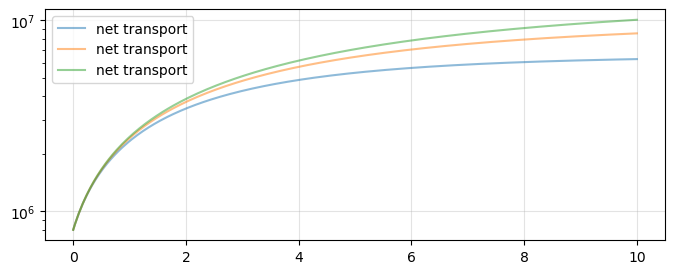

In [153]:


fig = plt.figure(figsize=(8,3))
id = 1 
ir = 2
ik = 13

colors = ["#164F73", "#75A653", "#F2BC79", "#D9665B"]

axp = plt.gca()

depth = dst.depth.values[id]
for ir in range(0,1):
    ratio = dst.ratio.values[ir*2]
    h1 = depth*ratio
    h2 = depth - h1
    for ik in range(11, 14):
        kappa = dst.kappa.values[ik]

        axp.plot(dst.t.values/3600, dst.m1.values[:, id ,ir*2,ik], '-', alpha=0.5, label="net transport")
        # axp.plot(dst.t.values/3600, -diffusion, '--', label="diffusion", alpha=0.5)

        # gradient = np.gradient(dst.m1.values[:, id ,ir*2,ik], dst.t.values)
        # index = np.where(gradient < 0)[0][0]
        # print("@ kappa = %2.2e" % dst.kappa.values[ik])
        # print("starts dying at t= %2.2f" % (dst.t.values[index]/3600))
        # axp.plot(dst.kappa.values[ik], dst.t.values[index]/3600, 'o', color=colors[ir])
# print(gradient)
axp.set_yscale("log")
# axp.set_ylabel("Hours")
# axp.set_xlabel("Kappa (m/s)")
axp.grid( alpha=0.35)
# axp.set_xlim(0, 40)
axp.legend()

$$ J  = \begin{bmatrix}
    -\frac{\kappa}{H_1} + \alpha \left(\frac{N_1}{\gamma_M + N_1}\right) - L_m & 
    \frac{\kappa}{H_1} +  \frac{w_m}{H_1}  & \alpha M_1 \left( \frac{\gamma_M}{(N_1 + \gamma_M)^2} \right) \\
    \frac{\kappa}{H_2} & -\frac{w_m}{H_2} - \frac{\kappa}{H_2} - L_m 
     & 0  \\
       - U_{m} \left(\frac{N_1}{N_1 + \gamma_{NM}}\right)  & 0  & -\frac{\kappa}{H_1}  - U_M M_1 \left(\frac{\gamma_{NM}}{(N_1 + \gamma_{NM})^2} \right) \\
\end{bmatrix}$$



In [154]:

    


def steady_state(H, R, kappa, d2, m2, n1):

    # Solution 1:
    d1 = -d2*kappa/(-H*Ld*R + H*R*growth_d*n1 - kappa - wd)
    m1 = (-kappa*m2 - m2*wm)/(-H*Lm*R + H*R*growth_m*n1 - kappa)

    return (d1, m1)






In [155]:
id = 3
ik = 12
ir = 2

depth = dst.depth.values[id]
ratio = dst.ratio.values[ir]
kappa = dst.kappa.values[ik]

m1 = dst.m1.values[:, id ,ir,ik]
d1 = dst.d1.values[:, id ,ir,ik]
d2 = dst.d2.values[:, id ,ir,ik]
m2 = dst.m2.values[:, id ,ir,ik]
n1 = dst.n1.values[:, id ,ir,ik]
txt = "Depth = %2.2f m, R = %2.1f, Kappa = %1.0e" % (depth, ratio, kappa)

m1_eq, d1_eq = steady_state(depth, ratio, kappa, d2, m2, n1)
print("depth = %2.2f, ratio = %2.2f, kappa = %1.0e" % (depth, ratio, kappa))

NameError: name 'growth_d' is not defined

In [ ]:
def set_up_phase_axes(fig, axs): 
    axs = axs.flatten()

    gs = axs[1].get_gridspec()

    axs[0].remove()
    axs[1].remove()
    axs[2].remove()

    axs[3].remove()
    axs[4].remove()
    axs[5].remove()

    axphase = fig.add_subplot(gs[0:, 0])
    axp = fig.add_subplot(gs[1:3])
    axn = fig.add_subplot(gs[4:6])
    return axphase, axp, axn


805875.6824430464 800748.5443572211


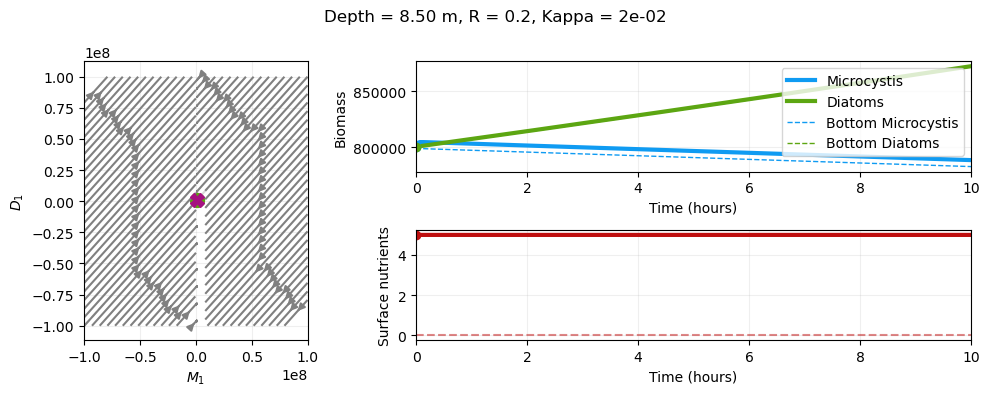

AssertionError: 

In [157]:
NN = 3

# MM = 3e6
M0 = 10e7 #890000
M00 = -M0 #M0*0.6

id = 9
ik = 2
ir = 2

depth = dst.depth.values[id]
ratio = dst.ratio.values[ir]
kappa = dst.kappa.values[ik]

txt = "Depth = %2.2f m, R = %2.1f, Kappa = %1.0e" % (depth, ratio, kappa)

x = np.linspace(M00, M0, NN)
y = np.linspace(M00, M0, NN)
X, Y = np.meshgrid(x, y)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 4), sharey=False, sharex=False)
txt = "Depth = %2.2f m, R = %2.1f, Kappa = %1.0e" % (depth, ratio, kappa)
fig.suptitle("Depth = %2.2f m, R = %2.1f, Kappa = %1.0e" % (depth, ratio, kappa))

axphase, axp, axn = set_up_phase_axes(fig, axs)

axn.plot(dst.t.values/3600, dst.n1.values[:, id ,ir,ik], color='#BF0F0F', linewidth=3)
biomass_m = dst.m1.values[:, id ,ir,ik] + dst.m2.values[:, id ,ir,ik]
biomass_d = dst.d1.values[:, id ,ir,ik] + dst.d2.values[:, id ,ir,ik]
axp.plot(dst.t.values/3600, dst.m1.values[:, id ,ir,ik], label=r"Microcystis", color='#0F9BF2', linewidth=3)
axp.plot(dst.t.values/3600, dst.d1.values[:, id ,ir,ik], label=r"Diatoms", color='#5CA612', linewidth=3)
axp.plot(dst.t.values/3600, dst.m2.values[:, id ,ir,ik], '--', label=r"Bottom Microcystis", color='#0F9BF2', linewidth=1)
axp.plot(dst.t.values/3600, dst.d2.values[:, id ,ir,ik], '--',  label=r"Bottom Diatoms", color='#5CA612', linewidth=1)

axphase.plot(dst.m1.values[0, id ,ir,ik], dst.d1.values[0, id ,ir,ik], '^', color='k', alpha=0.3, linewidth=4)
axphase.grid(alpha=0.2)
axn.grid(alpha=0.2)
axp.grid(alpha=0.2)


axn.set_ylabel("Surface nutrients")
axp.set_ylabel("Biomass")
axp.set_xlabel("Time (hours)")

axn.set_xlabel("Time (hours)")
axn.set_xlim(0, dst.t.values[-1]/3600)
axp.set_xlim(0, dst.t.values[-1]/3600)
axp.legend(loc='upper right')

axn.hlines(1e-5, 0, dst.t.values[-1]/3600, colors='#BF0F0F', linestyles='dashed', alpha=0.5)

R = dst.ratio.values[ir]
H = dst.depth.values[id]
distances = [] 
for it in range(0, 300, 10):
    
    d1 = dst.d1.values[it, id ,ir,ik]
    d2 = dst.d2.values[it, id ,ir,ik] # (time, depth, ratio, kappa) 
    m1 = dst.m1.values[it, id ,ir,ik]
    m2 = dst.m2.values[it, id ,ir,ik]
    n1 = dst.n1.values[it, id ,ir,ik]

    U, V = np.zeros_like(X), np.zeros_like(Y)
    # Compute derivatives on grid
    for i in range(NN):
        for j in range(NN):
                f1, f2, f3, f4, f5 = pm.field_at_point_2s(R, H, kappa, X[i,j], m2, X[i,j], d2, n1)
                U[i,j] = f1
                V[i,j] = f3

    axp.plot(dst.t.values[it]/3600, m1 , 'o', color='#0F9BF2')
    axp.plot(dst.t.values[it]/3600, d1 , 'o', color='#5CA612')
    axn.plot(dst.t.values[it]/3600, n1 , 'o', color='#BF0F0F')

    axphase.plot([M00, M0], [M00, M0], '--', color='black', alpha=0.15)
    axphase.set_xlabel(r"$M_1$")
    axphase.set_ylabel(r"$D_1$")
    axphase.plot(dst.m1.values[0:it, id ,ir,ik], dst.d1.values[0:it, id ,ir,ik], '-', color='#5CA612', alpha=0.3, linewidth=4)
    axphase.plot(m1, d1, 'o', color='#5CA612', markersize=10)
    axphase.streamplot(x, y, U, V,  color="gray")
    d11, m11 = pm.steady_state_2s(ratio, depth, kappa, d2, m2, n1) #steady_state(depth, ratio, kappa, d2, m2, n1)
    axphase.plot(m11, d11, 'X', color="#A61281", markersize=10)
    distance = np.sqrt((m11/1e6 - m1/1e6)**2 + (d11/1e6 - d1/1e6)**2)
    # print(distance)
    print(m11, d11)
    distances.append(distance)
    plt.tight_layout()
    plt.show()

    axphase.set_xlim(M00, M0)
    axphase.set_ylim(M00, M0)
    axphase.hlines(0, M00, M0, colors='k', alpha=0.1)
    axphase.vlines(0, M00, M0, colors='k', alpha=0.1)
    assert(False)
    fig.savefig("gif/t_%03d.png" % it, dpi=150)

    axphase.cla()
    for art in list(axphase.lines[1:]):
        art.remove()
    for art in list(axn.lines[1:]):
        art.remove()
    for art in list(axp.lines[4:]):
        art.remove()
plt.close()


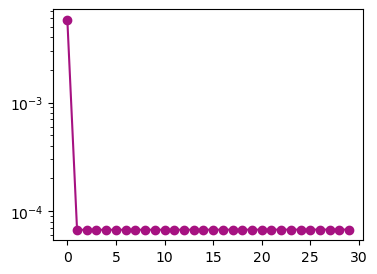

In [ ]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(1,1,1)
ax.plot( distances, '-o', color='#A61281')
ax.set_yscale('log')

In [ ]:
import imageio
import os

folder  = "gif/"
images = []
for file_name in sorted(os.listdir(folder)):
    if file_name.endswith('.png'):
        file_path = os.path.join(folder, file_name)
        images.append(imageio.imread(file_path))
imageio.mimwrite('time_evolution_%s.gif' % txt, images, fps=3)
print(txt)

/tmp/ipykernel_697228/1301611190.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))


Depth = 8.50 m, R = 0.2, Kappa = 3e-05
